# Logistic Regression

## Regularized logistic regression
- In scikit-learn, the hyperparameter "C" is the inverse of the regularization strength. In other words, larger C means less regularization and smaller C means more regularization.

![image-7](image-7.png)

**Note:** The orange curve shows what happens if we use a smaller value of C, which means more regularization for our logistic regression model. As expected, regularization makes the coefficients smaller.

In [1]:
#Load wine dataset from sklearn library
import sklearn.datasets
wine = sklearn.datasets.load_wine()

X = wine.data
y = wine.target

In [2]:
X.shape, y.shape

((178, 13), (178,))

In [3]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [6]:
# import model
from sklearn.linear_model import LogisticRegression

# How does regularization affect training accuracy?
lr_weak_reg = LogisticRegression(C=100) #larger C means less regularization
lr_strong_reg = LogisticRegression(C=0.01) #smaller C means more regularization

lr_weak_reg.fit(X_train,y_train)
lr_strong_reg.fit(X_train, y_train)

print(lr_weak_reg.score(X_train,y_train))
print(lr_strong_reg.score(X_train,y_train))

0.9699248120300752
0.9323308270676691


- more regularization: lower training accuracy
- The larger the regularization penalty (or the smaller we set C), the more we deviate from our goal of maximizing training accuracy. Hence, training accuracy goes down.

In [7]:
# How does regularization affect test accuracy?
lr_weak_reg = LogisticRegression(C=100) #larger C means less regularization
lr_strong_reg = LogisticRegression(C=0.01) #smaller C means more regularization

lr_weak_reg.fit(X_train,y_train)
lr_strong_reg.fit(X_train, y_train)

print(lr_weak_reg.score(X_test,y_test))
print(lr_strong_reg.score(X_test,y_test))

0.9333333333333333
1.0


- more regularization: (almost always) higher test accuracy

#### Conclusion
- Larger C--> Weak regularization--> Less penalized--> Overfitting--> model cannot generalize and fits too closely to the training dataset instead--> Higher training accuracy--> Less testing accuracy

- Smaller C--> Strong regularization--> High penalized--> Underfitting--> model is unable to capture the relationship between the input and output variables accurately--> Lower training accuracy--> (mostly)Higher test accuracy

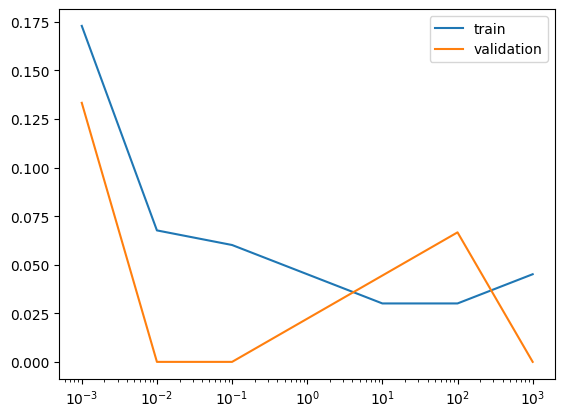

In [8]:
import matplotlib.pyplot as plt

# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Loop over values of C_value
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_test, y_test) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

When value of `C` is less, it has more regularization and so the training accuracy is lower resulting in higher error but when value of `C` increases, regularization decreases and so training accuracy increases, resulting in lower error.

## L1 vs. L2 regularization
- Lasso = linear regression with L1 regularization
- Ridge = linear regression with L2 regularization

In [9]:
lr_L1 = LogisticRegression(solver='liblinear', penalty='l1')
lr_L2 = LogisticRegression() #penalty='l2' by default

lr_L1.fit(X_train, y_train)
lr_L2.fit(X_train, y_train)

LogisticRegression()

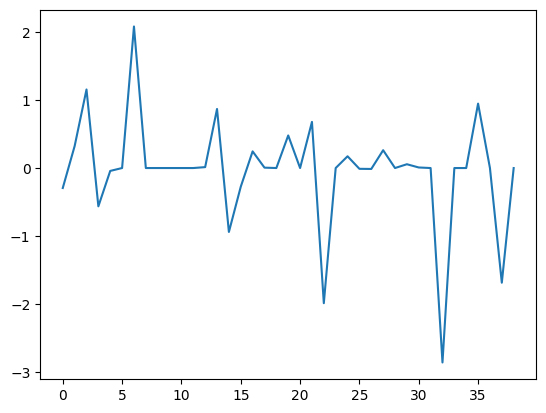

In [10]:
import matplotlib.pyplot as plt
plt.plot(lr_L1.coef_.flatten())

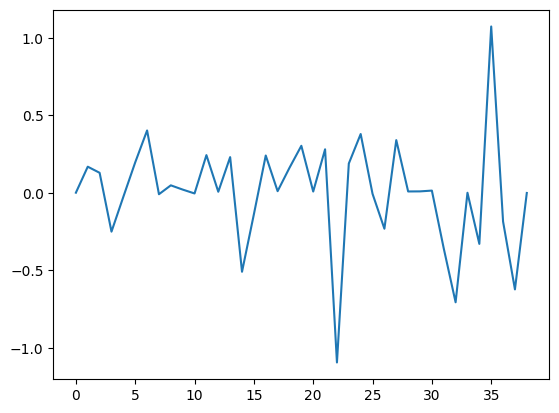

In [11]:
plt.plot(lr_L2.coef_.flatten())

#### Conclusion
As you can see, L1 regularization set many of the coefficients to zero, thus ignoring those features; in other words, it performed feature selection for us. On the other hand, L2 regularization just shrinks the coefficients to be smaller. This is analogous to what happens with Lasso and Ridge regression.

## L1 regularization = Lasso regularization 

In [12]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Specify L1 regularization
lr = LogisticRegression(solver='liblinear', penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 10}
Total number of features: 39
Number of selected features: 27


## Logistic regression and probabilities
- logistic regression predictions: sign of raw model output
- logistic regression probabilities: "squashed" raw model output

![image-8](image-8.png)

When the raw model output is positive, we would have predicted the positive class, and indeed the probability of the positive class approaches 1. When the raw model output is negative, we would have predicted the negative class, and indeed the probability of the positive class approaches 0, which is another way of saying that we're very confident it's the negative class.

<Figure size 640x480 with 0 Axes>

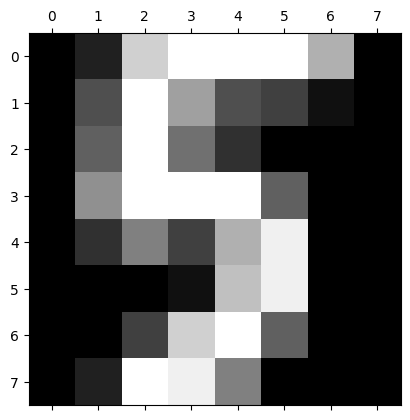

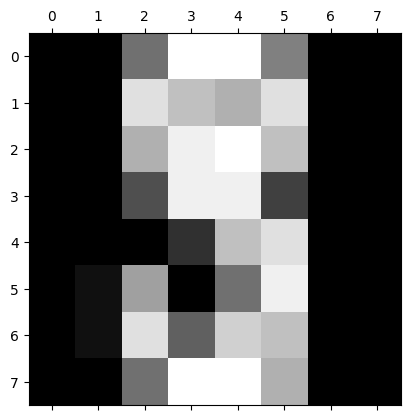

In [13]:
import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[proba_inds[-1]]) 

# Show the least confident (most ambiguous) digit
plt.matshow(digits.images[proba_inds[0]])

plt.show()

## Multi-class logistic regression

### 1. One-vs-rest strategy

In [14]:
#Load wine dataset from sklearn library
import sklearn.datasets
wine = sklearn.datasets.load_wine()

X = wine.data
y = wine.target

In [15]:
# instantiated 3 logistic regression
lr0 = LogisticRegression()
lr1 = LogisticRegression()
lr2 = LogisticRegression()

In [16]:
# fit classifiers
lr0.fit(X,y==0) # The code y==0 returns an array the same size as y that's True when y is 0 and False otherwise, so the classifier learns to predict these true/false values
lr1.fit(X,y==1)
lr2.fit(X,y==2)

LogisticRegression()

In [17]:
# get raw model output
print(lr0.decision_function(X)[143])
print(lr1.decision_function(X)[143])
print(lr2.decision_function(X)[143])

-5.124359046435448
-2.354026870570971
1.4438855842885687


**Note:** In this case, the largest raw model output comes from classifier 2. This means it's more confident that the class is 2 than any of the other classes, so we predict class 2.

In [18]:
# one-vs-rest using logistic regression
lr = LogisticRegression(multi_class='ovr')
lr.fit(X,y)
lr.predict(X)[143]

2

We get the same prediction, of 2, as expected.

### 2. Multinomial method

In [19]:
# multinomial using logistic regression
lr = LogisticRegression(multi_class='multinomial')
lr.fit(X,y)
lr.predict(X)[143]

2

### Fitting multi-class logistic regression

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [21]:
X = digits.data
y = digits.target

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [23]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(multi_class='ovr')
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial')
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

OVR training accuracy: 0.9948032665181886
OVR test accuracy    : 0.9644444444444444
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9733333333333334
